# Handwritten Digit Classification using CNN (MNIST)

This notebook builds and trains a Convolutional Neural Network (CNN) to classify
handwritten digits (MNIST). Accuracy, confusion matrix, and sample predictions
are shown, and output files are saved in the `outputs/` folder.


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random
import os

# Make sure outputs directory exists
os.makedirs("outputs", exist_ok=True)

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Training shape:", X_train.shape, "Testing shape:", X_test.shape)

Training shape: (60000, 28, 28, 1) Testing shape: (10000, 28, 28, 1)


In [11]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_split=0.1,
    batch_size=32
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9004 - loss: 0.3314 - val_accuracy: 0.9817 - val_loss: 0.0633
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9855 - loss: 0.0481 - val_accuracy: 0.9883 - val_loss: 0.0426
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9917 - val_loss: 0.0328
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.9942 - loss: 0.0197 - val_accuracy: 0.9922 - val_loss: 0.0315
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9910 - val_loss: 0.0374


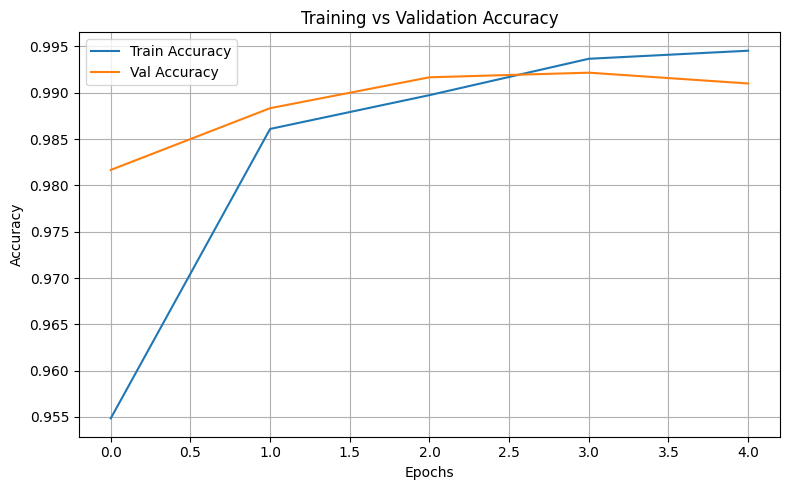

In [13]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/training_accuracy.png")
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9871 - loss: 0.0364
Test Accuracy: 0.9906


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


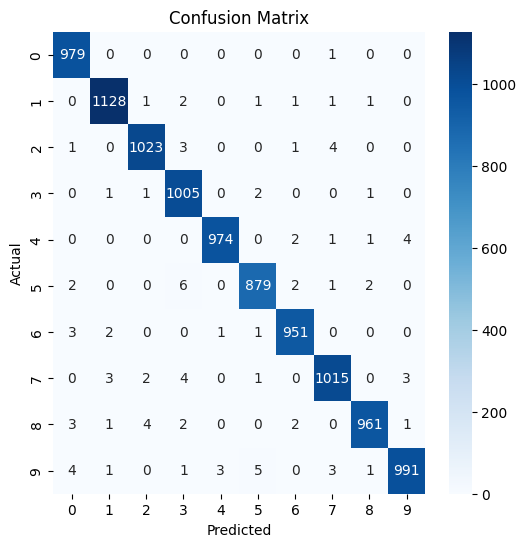

In [15]:
# Predictions for confusion
pred_probs = model.predict(X_test)
y_pred = np.argmax(pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("outputs/confusion_matrix.png")
plt.show()

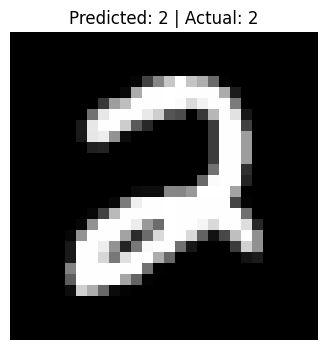

In [16]:
# random sample
idx = random.randint(0, len(X_test)-1)

plt.figure(figsize=(4,4))
plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {y_pred[idx]} | Actual: {y_test[idx]}")
plt.axis('off')
plt.savefig("outputs/sample_predictions.png")
plt.show()